## Importing Modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from prepareDF import PrepareDF, Labelencode
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from xgboost import XGBRegressor
import pandas as pd

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


import warnings
warnings.filterwarnings('ignore')

# 1) Data Preperation
---

In [2]:
MovieData = PrepareDF()

for ind, row in MovieData.iterrows():
    string = ''
    for genre in MovieData['genres'][ind]:
        string += genre+'|'
    MovieData['genres'][ind] = string[:-1]

labelEncoder = preprocessing.LabelEncoder()
MovieData = Labelencode(MovieData, labelEncoder)
MovieData.head()

,title,director,rating,genres,cast_1,cast_2,cast_3,cast_4
0,Sankofa,1224,7.0,235,1732,2515,128,2526
1,The Great British Baking Show,241,8.6,88,2095,3128,2204,2679
2,The Starling,3403,6.4,154,2098,646,1850,3471
3,Je Suis Karl,654,5.5,242,1910,1416,2333,1002
4,Grown Ups,871,6.0,143,30,1799,661,856


### 1.1) Getting Average Ratings by Predictors

In [3]:
# Calculate average ratings for director, genre, and cast
MovieData['director_avg_rating'] = MovieData.groupby('director')['rating'].transform('mean')
MovieData['genre_avg_rating'] = MovieData.groupby('genres')['rating'].transform('mean')
MovieData['cast_avg_rating'] = MovieData[['cast_1', 'cast_2', 'cast_3', 'cast_4']].mean(axis=1)

### 1.2) Getting interaction features

In [4]:
# Create interaction features
MovieData['director_genre_interaction'] = MovieData['director'] * MovieData['genres']
MovieData['director_cast_interaction'] = MovieData['director'] * MovieData['cast_avg_rating']
MovieData['genre_cast_interaction'] = MovieData['genres'] * MovieData['cast_avg_rating']

### 1.3) Encoding ['Genres']

In [5]:
# One-hot encoding for genres
MovieData = pd.get_dummies(MovieData, columns=['genres'])

### Preview

In [6]:
MovieData.head()

,title,director,rating,cast_1,cast_2,cast_3,cast_4,director_avg_rating,genre_avg_rating,cast_avg_rating,...,genres_321,genres_322,genres_323,genres_324,genres_325,genres_326,genres_327,genres_328,genres_329,genres_330
0,Sankofa,1224,7.0,1732,2515,128,2526,7.000,6.653456,1725.25,...,False,False,False,False,False,False,False,False,False,False
1,The Great British Baking Show,241,8.6,2095,3128,2204,2679,8.600,8.600000,2526.50,...,False,False,False,False,False,False,False,False,False,False
2,The Starling,3403,6.4,2098,646,1850,3471,6.400,6.500000,2016.25,...,False,False,False,False,False,False,False,False,False,False
3,Je Suis Karl,654,5.5,1910,1416,2333,1002,5.500,6.503279,1665.25,...,False,False,False,False,False,False,False,False,False,False
4,Grown Ups,871,6.0,30,1799,661,856,5.875,5.456250,836.50,...,False,False,False,False,False,False,False,False,False,False


# Simple ML Models
---

## Response -> ['rating']

## Predictors -> ['listed_in', 'directors, 'cast']

## 1a) Train Test Split

In [7]:
# Y = value to be predicted -> Rating
y= MovieData['rating'].values

# X = featuers used for prediction
x= MovieData.drop(columns=['title', 'rating', 'director', 'cast_1', 'cast_2', 'cast_3', 'cast_4'])

In [8]:
X_train, X_test, Y_trian, Y_test= train_test_split(x,y, test_size=0.2, random_state=0)

## 1b) Models

### 1b.1) Linear Regression



Mean Absolute Error: 0.2353338233996903
Mean Squared Error: 0.19647119588190193
R-squared: 0.8671058787354291


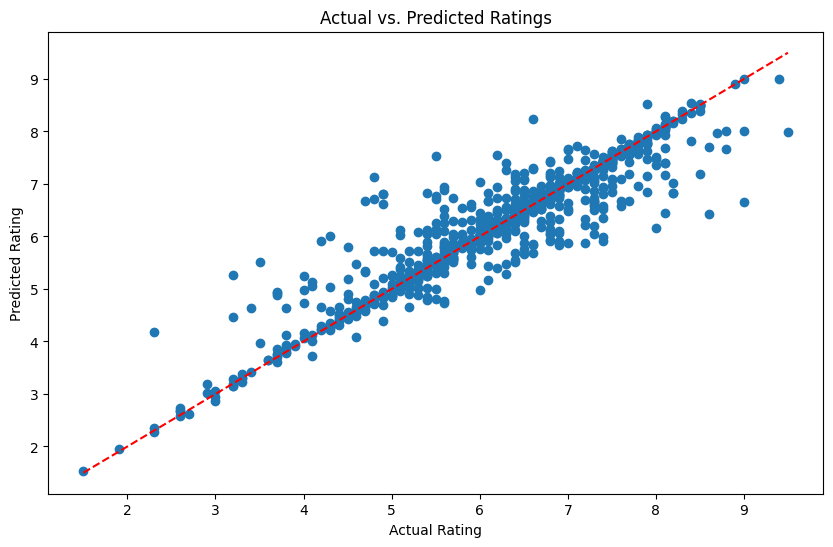

In [9]:
lm = LinearRegression()
lm = lm.fit(X_train, Y_trian)

# Train data prediction
train_pred = lm.predict(X_train)

# Test data prediction
predictions = lm.predict(X_test)


print('\n')

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test, predictions)
print(f"Mean Absolute Error: {mae}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, predictions)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared
r2 = r2_score(Y_test, predictions)
print(f"R-squared: {r2}")

#Visualise data (actual vs predicted)
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, predictions)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], '--', color='red')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actual vs. Predicted Ratings')
plt.show()

### 1b.2) Decision Tree

Mean Absolute Error: 0.3544489247311832
Mean Squared Error: 0.4330704077060932
R-squared: 0.707068962351177


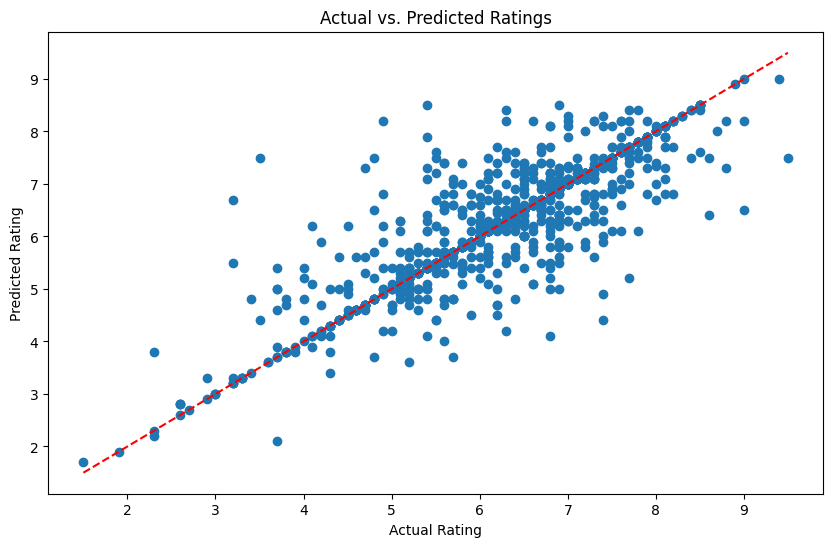

In [10]:
dr=DecisionTreeRegressor()
dr.fit(X_train,Y_trian)
predictions = dr.predict(X_test)


# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test, predictions)
print(f"Mean Absolute Error: {mae}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, predictions)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared
r2 = r2_score(Y_test, predictions)
print(f"R-squared: {r2}")

#Visualise data (actual vs predicted)
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, predictions)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], '--', color='red')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actual vs. Predicted Ratings')
plt.show()

### 1b.3) Random Forest

Mean Absolute Error: 0.2723964457725299
Mean Squared Error: 0.2539968402809789
R-squared: 0.8281952387900765


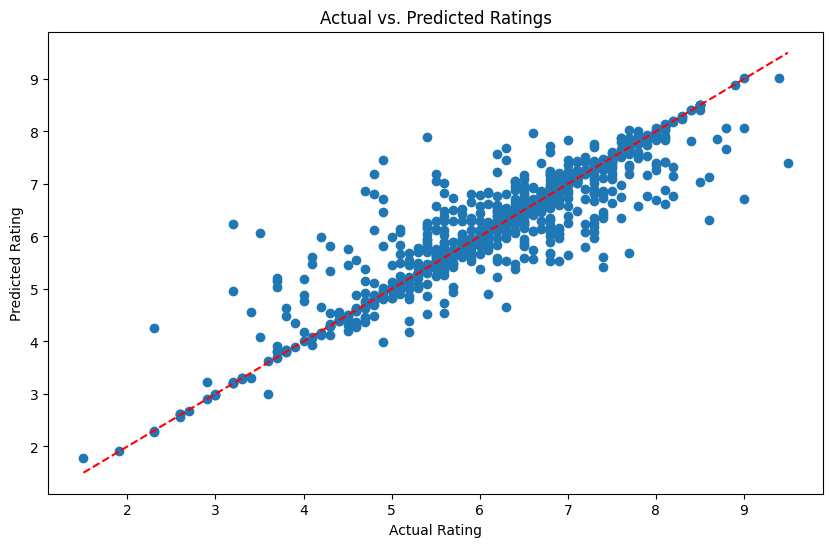

In [11]:
#Initialize model
randregrssor=RandomForestRegressor(n_estimators=100, max_depth=200)

randregrssor.fit(X_train,Y_trian)
predictions = randregrssor.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test, predictions)
print(f"Mean Absolute Error: {mae}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, predictions)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared
r2 = r2_score(Y_test, predictions)
print(f"R-squared: {r2}")

#Visualise data (actual vs predicted)
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, predictions)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], '--', color='red')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actual vs. Predicted Ratings')
plt.show()

### 1b.4) XGboost

Mean Absolute Error: 0.2590586650515756
Mean Squared Error: 0.218804712604556
R-squared: 0.8519993738542313


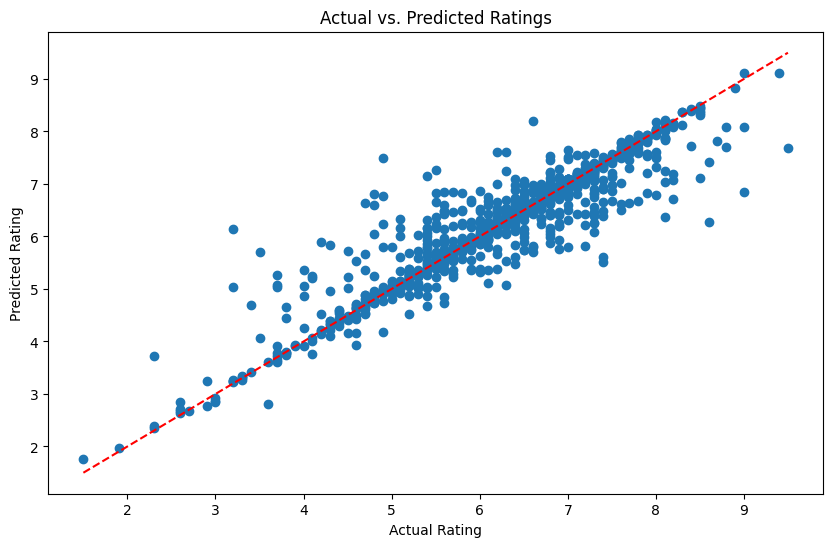

In [12]:
xgboost=XGBRegressor(n_estimators=50)

xgboost.fit(X_train,Y_trian)
predictions=xgboost.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test, predictions)
print(f"Mean Absolute Error: {mae}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, predictions)
print(f"Mean Squared Error: {mse}")
 
# Calculate R-squared
r2 = r2_score(Y_test, predictions)
print(f"R-squared: {r2}")

#Visualise data (actual vs predicted)
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, predictions)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], '--', color='red')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actual vs. Predicted Ratings')
plt.show()